In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + np.random.normal(0., 10., size=100)

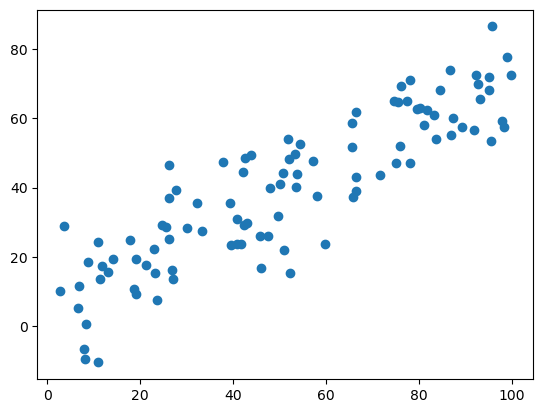

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### Demean

In [4]:
def demean(X: np.ndarray):
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

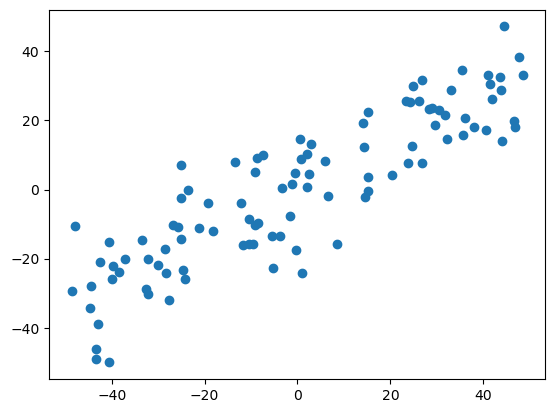

In [6]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [7]:
np.mean(X_demean[:, 0])

9.947598300641404e-16

In [8]:
np.mean(X_demean[:, 1])

2.4868995751603505e-15

### Gradient Ascent

In [9]:
def f(w, X):
    return np.sum((X.dot(w) ** 2)) / len(X)

def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def df_dbg(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [10]:
def direction(w): # 把某个向量变成单位向量
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 每一次都使得w成为单位上升向量
        if abs(f(w, X) - f(last_w, X)) < epsilon:
            break
        cur_iter += 1
    return w

In [11]:
initial_w = np.random.random(X.shape[1]) # 随即化搜索的初始点
eta = 0.01
# PCA问题不可以进行标准化这个过程。

gradient_ascent(df_dbg, X_demean, initial_w, eta)

array([0.81019925, 0.58615456])

In [12]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

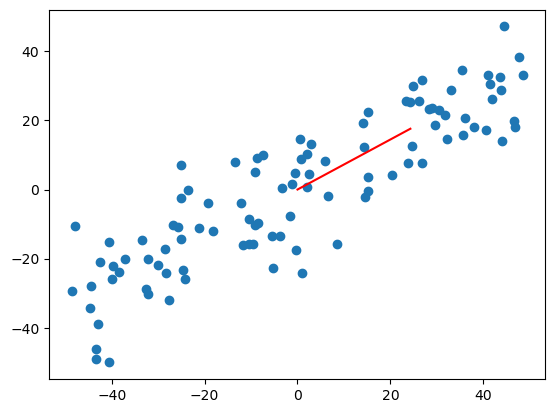

In [13]:
# 绘制出球出来的轴，这个轴就是所谓的主成分，也因为这是第一个主成分，也叫第一主成分
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0] * 30], [0, w[1] * 30], color="r")

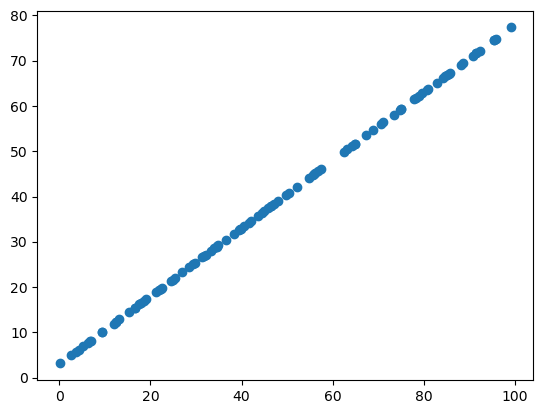

In [14]:
# test
X2 = np.empty((100, 2))
X2[:, 0] = np.random.uniform(0., 100., size=100)
X2[:, 1] = 0.75 * X2[:, 0] + 3. # 和X的区别就是没有噪音

plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [15]:
X2_demean = demean(X2)
initial_w = np.random.random(X2.shape[1]) # 随即化搜索的初始点
eta = 0.01
# PCA问题不可以进行标准化这个过程。

w2 = gradient_ascent(df_dbg, X2_demean, initial_w, eta)

In [16]:
w2

array([0.80000002, 0.59999997])

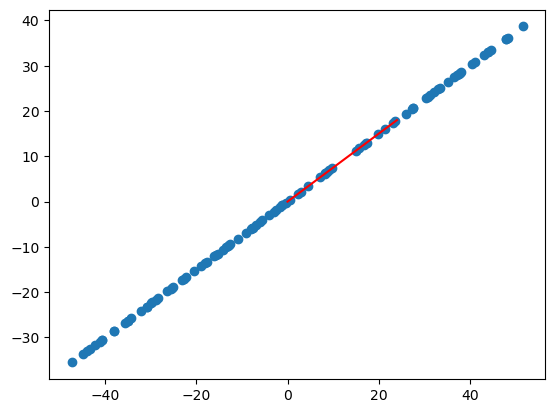

In [19]:
plt.scatter(X2_demean[:, 0], X2_demean[:, 1])
plt.plot([0, w2[0] * 30], [0, w2[1] * 30], color="r")